# `[L, U, P]=lu(mat)`

##### Q1: 为什么 LU 分解前要先进行行置换
例如, 主对角线上的元素为 0, 无法进行算法

In [40]:
% [L, U, P] = lu(A).
% PA = LU

A = [4 -5 -2;
     5 -6 -2;
    -8  9  3];
[L, U, P] = lu(A);

disp('L = ');
disp(L);
disp('U = ');
disp(U);
disp('P = ');
disp(P);

L = 
                         1                         0                         0
                      -0.5                         1                         0
                    -0.625                      0.75                         1

U = 
                        -8                         9                         3
                         0                      -0.5                      -0.5
                         0                         0                      0.25

P = 
     0     0     1
     1     0     0
     0     1     0



In [41]:
disp('PA = ');
disp(P*A);
disp('LU = ');
disp(L*U);

PA = 
    -8     9     3
     4    -5    -2
     5    -6    -2

LU = 
    -8     9     3
     4    -5    -2
     5    -6    -2



# `inv(mat)`

In [42]:
inv(A)


ans =

     0    -3    -2
     1    -4    -2
    -3     4     1



# `det(mat)`

In [43]:
det(A)


ans =

     1



# `norm(v, p)` `norm(A, p)`

In [44]:
v = [1, -2, 3, -4];
norm(v)


ans =

          5.47722557505166



In [45]:
% 计算向量的范数时, 可选:
% 1: 1 范数, 绝对值之和
% 2: 2 范数, 默认
% n: n 范数
% Inf: 无穷范数, 绝对值的最大
% -Inf: 负无穷范数, 绝对值的最小
norm(v, 1)
norm(v, 2)
norm(v, 3)
norm(v, Inf)
norm(v, -Inf)


ans =

    10


ans =

          5.47722557505166


ans =

          4.64158883361278


ans =

     4


ans =

     1



In [46]:
A = [1, -2,  3;
    -4,  5, -6;
     7, -8,  9];
norm(A)


ans =

          16.8481033526142



In [47]:
% 计算矩阵的范数时, 可选:
% 1: 1-范数, 列向量的 1-范数的最大值, 列和范数
norm(A, 1)


ans =

    18



In [48]:
% 2: 2-范数, 谱范数, 矩阵的最大奇异值, (A^T)A 最大特征值的平方根
norm(A, 2)


ans =

          16.8481033526142



In [49]:
% 没有 3 或者其他自然数的范数
% norm(A, 3)

In [50]:
% Inf: 无穷范数, 行向量的 1-范数的最大值, 行和范数
norm(A, Inf)


ans =

    24



In [51]:
% -Inf: 负无穷范数, 行向量 1-范数的最小值
% norm(A, -Inf)

% 似乎不支持

% Error using norm

% When the first input is a matrix, the second input must be 1, 2, inf, or 'fro'.  When the first input is a vector, the second input must be a positive real-valued scalar, inf, -inf, or 'fro'.

In [52]:
% fro: Frobenius-范数, 所有元素的平方和的平方根, 类似向量的 2-范数
norm(A, "fro")


ans =

          16.8819430161341



In [53]:
% 展平操作, 可以验证 Frobenius-范数
norm(A(:))


ans =

          16.8819430161341



# `[U, S, V]=svd(mat)`

In [54]:
[U, S, V] = svd(A)


U =

        -0.214837238368397        -0.887230688346371         0.408248290463862
         0.520587389464737         0.249643952988297         0.816496580927726
        -0.826337540561078         0.387942782369774         0.408248290463863


S =

          16.8481033526142                         0                         0
                         0          1.06836951455471                         0
                         0                         0      3.33475286503143e-16


V =

        -0.479671177877772          0.77669099032156        -0.408248290463863
         0.572367793972062       -0.0756864701045581        -0.816496580927726
        -0.665064410066353        -0.625318050112442        -0.408248290463863



# `[V, D]=eig(mat)`

In [55]:
A = [3,  0;
     8, -1];
[V, D] = eig(A)


V =

                         0         0.447213595499958
                         1         0.894427190999916




D =

    -1     0
     0     3



In [56]:
A*V
V*D


ans =

                         0          1.34164078649987
                        -1          2.68328157299975


ans =

                         0          1.34164078649987
                        -1          2.68328157299975



# `fzero(fun, x0)`

Brent 方法, 结合了二分法, 逆二次插值法, 黄金分割搜索的混合算法

In [57]:
% fun 方程, x0 迭代的初始值
eq = @(x) x.^2 - 4;
root1 = fzero(eq, 1)
root2 = fzero(eq, -1)


root1 =

     2


root2 =

    -2



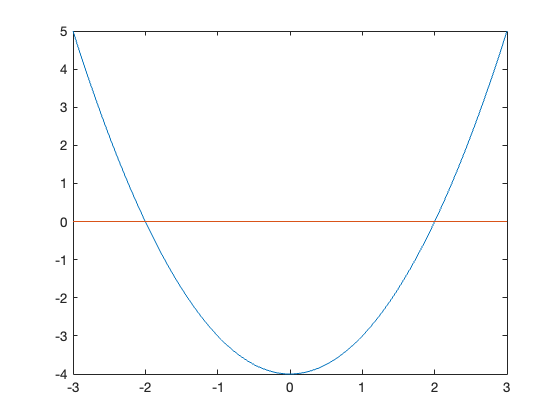

In [58]:
x_list = linspace(-3, 3, 1000);
y_list = eq(x_list);
plot(x_list, y_list)
hold on
plot([x_list(1), x_list(end)], [0, 0])

# `quad(fun, a, b)` `quadl(fun, a, b)`

`quad` 使用自适应辛普森法，而 `quadl` 使用自适应Lobatto求积法. `quadl` 通常提供更高的精确度但可能需要更多的计算资源。

In [59]:
fun = @(x) exp(-x.^2);
quad(fun, 0, 100000)
quad(fun, 0, Inf)
% 不知道为什么会有警告


ans =

         0.886228899324606

> In quad (line 100)

ans =

   NaN



In [60]:
quadl(fun, 0, 100000)
quadl(fun, 0, Inf)


ans =

         0.886226925511496

> In quadl (line 96)

ans =

   Inf



In [61]:
func = @(x) 1./x.^(1/2);
quad(func, 0, 1)
quadl(func, 0, 1)


ans =

          2.00001060948268


ans =

          2.00000041535995



In [62]:
h = @(x) 1./x.^2;
quad(h, 1, 1000000)
quad(h, 1, Inf)
quadl(h, 1, Inf)


ans =

         0.999999857609685

> In quad (line 100)

ans =

   NaN

> In quadl (line 96)

ans =

   Inf



# `[t, y] = ode45(odefun, tspan, y0)`

显式 Runge-Kutta 算法, 非刚性微分方程的首选算法

#### 解方程
$$
\frac{\mathrm{d}y}{\mathrm{d}t} = t
$$

In [63]:
ode_func = @(t, y) t;
t_span = [-1, 1];
y0 = 1;
[t, y] = ode45(ode_func, t_span, y0);

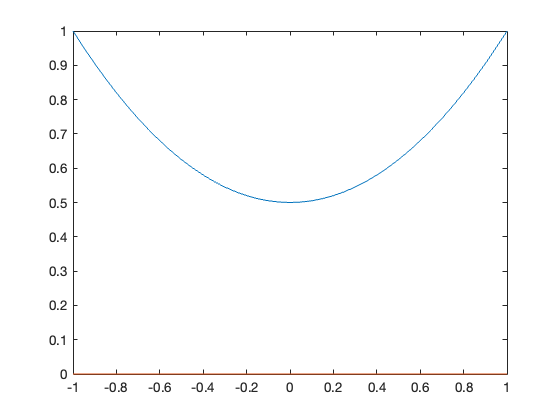

In [64]:
plot(t, y)
hold on
plot([-1, 1], [0, 0])

#### 解二阶方程
$$
\frac{\mathrm{d^2}y}{\mathrm{d}t^2}=t
$$

In [65]:
% 解二阶方程要化为各个一阶方程
% 记住, y0 对应的值是 t_span 对应左区间时的值
% 不是 t=0 时候的值
ode_func = @(t, y) [y(2); t];
t_span = [0, 1];
y0 = [0, 0];
[t, y] = ode45(ode_func, t_span, y0);

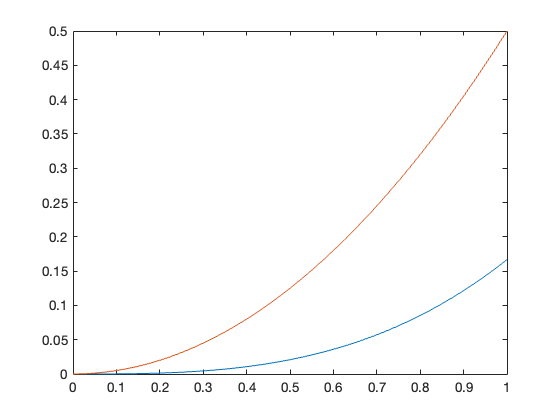

In [66]:
% y(:, 1) 对应的是 y
% y(:, 2) 对应的是 y'
plot(t, y)

#### 解方程
$$
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = \frac{\mathrm{d}y}{\mathrm{d}t}+y+t
$$

In [67]:
ode_func = @(t, y) [y(2); y(2)+y(1)+t];
t_span = [0, 1];
y0 = [0, 0];
[t, y] = ode45(ode_func, t_span, y0);

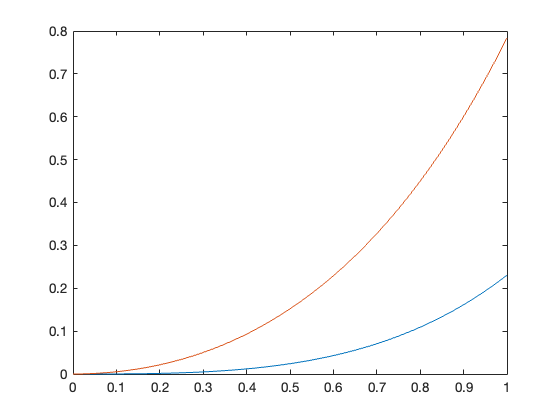

In [68]:
plot(t, y)

#### 解方程
$$
x''=-x-1x'
$$

In [69]:
ode_func = @(t, x) [x(2); -x(2)-x(1)];
t_span = [0, 10];
x0 = [1, 1];
[t, x] = ode45(ode_func, t_span, x0);

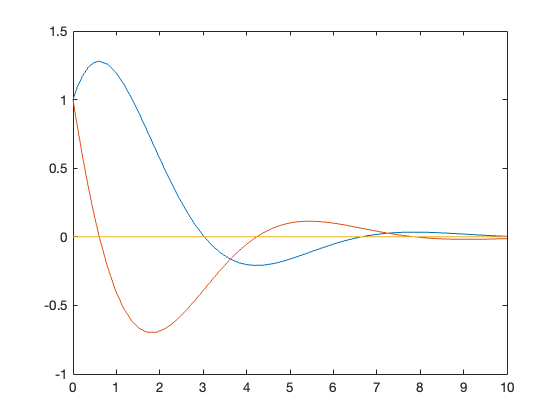

In [70]:
plot(t, x);
hold on;
plot([0, 10], [0, 0]);

#### 解阻尼振荡
$$
x'' = -7x - 0.5x' + 3 \cos t
$$

In [71]:
ode_func = @(t, x) [x(2); -7*x(1)-0.5*x(2)+3*cos(t)];
t_span = [0, 25];
x0 = [3, 4];
[t, x] = ode45(ode_func, t_span, x0);

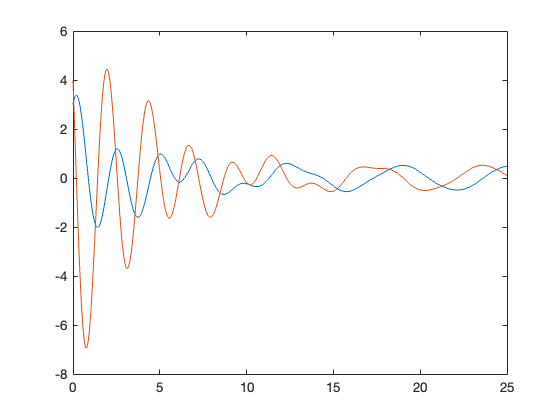

In [72]:
plot(t, x)

# `p=poly(A)` `p_str=poly2str(p, 's')`

In [73]:
A = [1, 2, 3;
     4, 5, 6;
     7, 8, 9];
p = poly(A)


p =

  Columns 1 through 3

                         1                       -15                       -18

  Column 4

     -1.88269367722369e-14



In [74]:
% p_str = poly2str(p, 's');
% 这个函数似乎被这个版本删除了

# `polyval(p, x)`

In [75]:
% p 应当是降次的
polyval(p, 1)
polyval(p, 0)


ans =

                       -32


ans =

     -1.88269367722369e-14



# `polyvalm(p, mat)`

In [76]:
% Calay-Hamilton 定理, 矩阵应当适合自己的多项式
polyvalm(p, A)


ans =

      4.76776621420433e-13      5.93303184359684e-13        7.069900220813e-13
      1.10844666778576e-12      1.31699340645675e-12      1.61293201017543e-12
      1.71951342053944e-12      2.08899564313469e-12      2.50004706149732e-12



In [77]:
B = rand(5, 5);
polyvalm(poly(B), B)


ans =

  Columns 1 through 3

      3.23491233800155e-14      2.09138262263764e-14      1.76317294098283e-14
      2.23224216888696e-14      1.45439216225896e-14      1.22610255282041e-14
      4.44366765606219e-14      2.85327317328665e-14      2.40918396343659e-14
      3.61377594515488e-14      2.36061170610924e-14      1.99562588676372e-14
      3.75810493835615e-14       2.4459601011273e-14      2.06848427275474e-14

  Columns 4 through 5

      1.75137682134618e-14      2.40675535057022e-14
      1.20493892641349e-14      1.67140606910365e-14
      2.39253061806721e-14       3.2689129181307e-14
       1.9817480989559e-14      2.66731081666194e-14
      2.01089145335231e-14      2.81857870376712e-14



# `roots(p)`

In [78]:
A = [1, 2;
     3, 4];
p = poly(A)
roots(p)


p =

                         1                        -5                        -2


ans =

          5.37228132326901
        -0.372281323269014



In [79]:
p = [1, -3, 2];
roots(p)


ans =

     2
     1



# `conv(a, b)`

$$
y_n=(a*b)_n=\sum_{k=-\infty}^{+\infty}a_{k}b_{n-k}
$$

In [80]:
% conv 求两个多项式的卷积
p = [1, 2, 3];
q = [4, 5, 6];
conv(p, q)


ans =

     4    13    28    27    18



# `conv2(A, B)`

二维离散卷积
$$
z(i, j)=\sum_m\sum_n x(m, n)y(i-m, j-n)
$$

In [81]:
A = [1, 2, 3;
     3, 2, 1;
     4, 3, 2];
B = [4, 3, 2;
     3, 2, 1;
     3, 1, 2];
conv2(A, B)


ans =

     4    11    20    13     6
    15    25    30    15     5
    28    43    48    23    11
    21    26    27    12     4
    12    13    17     8     4



# `filter2(A, B)`

二维相关运算
$$
z(i, j)=\sum_m\sum_n x(m, n)y(i+m, j+n)
$$

# `diff(arr)`

In [82]:
arr = [1, 2, 3, 4, 3, 2, 1];
diff(arr)


ans =

     1     1     1    -1    -1    -1



# `smooth(X, span, method)`

smooth 通过多种方法对一维数据进行平滑。它的基本作用是减少数据中的高频噪声，保留低频信号或趋势。

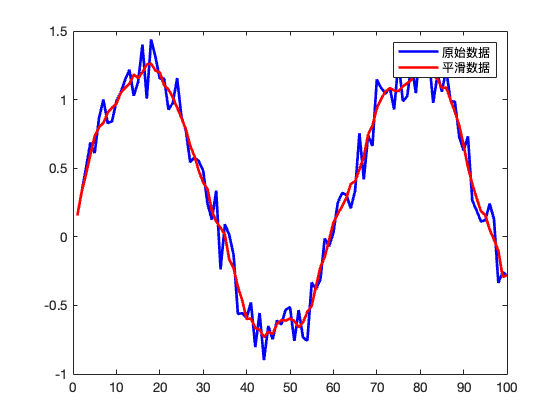

In [83]:
x = 1:100; 
y = sin(x/10) + rand(1, 100)*0.5;
y_smooth = smooth(y);
plot(x, y, 'b', x, y_smooth, 'r', 'LineWidth', 2);
legend('原始数据', '平滑数据');

| 方法               | 关键词              | 说明                                                                 |
|--------------------|---------------------|----------------------------------------------------------------------|
| 移动平均           | `'moving'`（默认） | 使用简单的移动平均法对数据进行平滑。                                |
| Savitzky-Golay     | `'sgolay'`          | 使用 Savitzky-Golay 滤波器，可以保留数据的局部特性，如峰值和斜率。   |
| 高斯滤波           | `'gaussian'`        | 使用高斯加权的方法进行平滑。                                        |
| Loess              | `'lowess'`          | 局部加权线性回归，适合少量噪声的平滑。                              |
| Robust Loess       | `'rlowess'`         | 带鲁棒性的局部加权线性回归，对异常值的鲁棒性更强。                  |
| Loess (二次)       | `'loess'`           | 局部加权二次回归，比 `'lowess'` 更平滑。                            |
| Robust Loess (二次)| `'rloess'`          | 带鲁棒性的局部加权二次回归。                                        |

# `p=plotfit(x, y, n)`

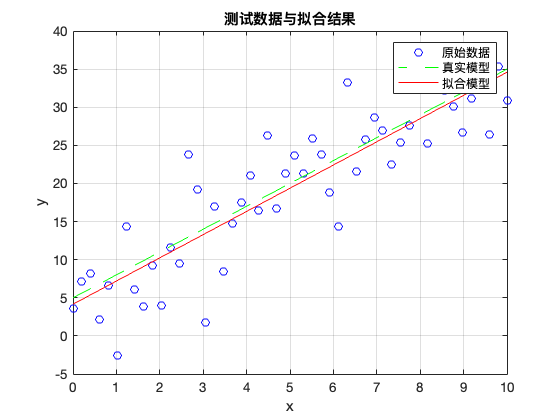

In [84]:
x = linspace(0, 10, 50);
y_true = 3*x + 5;
noise = randn(size(x)) * 5;
y_noisy = y_true + noise;

fitModel = polyfit(x, y_noisy, 1);  
y_fit = polyval(fitModel, x);

figure;
plot(x, y_noisy, 'bo', 'DisplayName', '原始数据');
hold on;
plot(x, y_true, 'g--', 'DisplayName', '真实模型');
plot(x, y_fit, 'r-', 'DisplayName', '拟合模型');
legend show;
xlabel('x');
ylabel('y');
title('测试数据与拟合结果');
grid on;

# `vq=interp1(x,v,xq,method,extrapval)`

    • x：已知数据点的横坐标（必须为单调递增或递减的向量）
    • v：对应于 x 的已知函数值（同样是向量）。
    • xq：插值点的横坐标，可以是标量或向量。
    • method（可选）：插值方法（默认 'linear'）。

        •	'linear'：线性插值。
        •	'nearest'：最近邻插值。
        •	'next' 或 'previous'：使用下一个或上一个点的值。
        •	'spline'：三次样条插值，平滑且适合曲线插值。
        •	'pchip'：分段三次 Hermite 插值，保持局部单调性。
        •	'makima'：修正 Akima 插值，平滑且鲁棒。
        •	'cubic'：等价于 'pchip'。
        •	extrapval（可选）：外插值（即超出 x 范围的 xq）的值，默认情况下为 NaN。

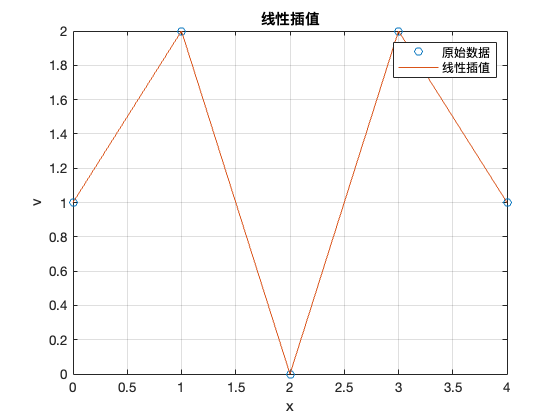

In [85]:
x = [0, 1, 2, 3, 4];
v = [1, 2, 0, 2, 1];
xq = 0:0.1:4;

vq = interp1(x, v, xq);

plot(x, v, 'o', xq, vq, '-');
legend('原始数据', '线性插值');
xlabel('x');
ylabel('v');
title('线性插值');
grid on;

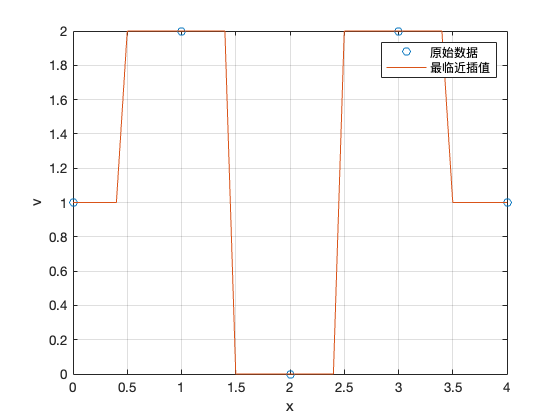

In [86]:
x = [0, 1, 2, 3, 4];
v = [1, 2, 0, 2, 1];
xq = 0:0.1:4;

vq = interp1(x, v, xq, 'nearest');

plot(x, v, 'o', xq, vq, '-');
legend('原始数据', '最临近插值');
xlabel('x');
ylabel('v');
grid on;

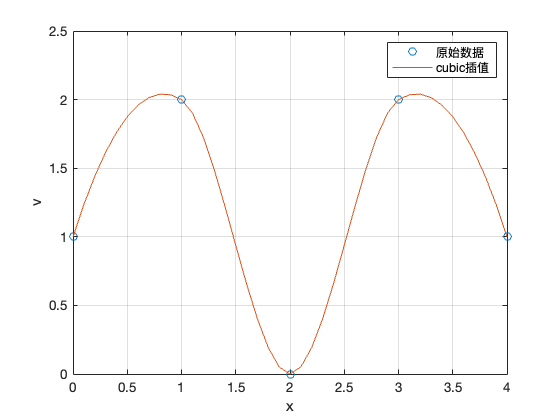

In [87]:
x = [0, 1, 2, 3, 4];
v = [1, 2, 0, 2, 1];
xq = 0:0.1:4;

vq = interp1(x, v, xq, 'cubic');

plot(x, v, 'o', xq, vq, '-');
legend('原始数据', 'cubic插值');
xlabel('x');
ylabel('v');
grid on;

# `Xf=fft(xt,N,DIM)` `Xt=ifft(xf,N,DIM)`

In [8]:
t = linspace(0, 10, 1e5);
x = sin(t)+cos(2*t);

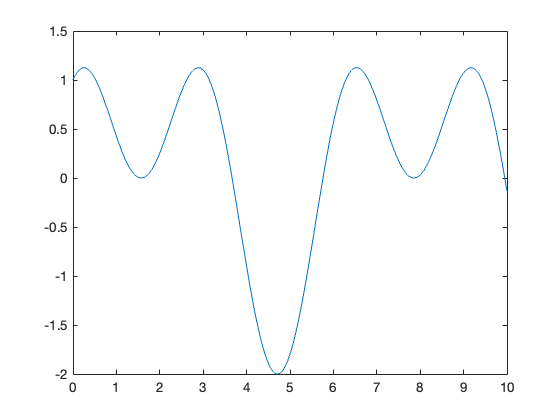

In [9]:
plot(t, x)

In [10]:
xf = fft(x, length(t));

In [ ]:
plot()

Error using scatter (line 55)
Not enough input arguments.

